# Data Prep

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sys, os
sys.path.append(os.path.abspath(".."))
#print("Estoy aquí:", os.getcwd())
#print("Archivos en esta carpeta:", os.listdir())


In [2]:
from src.preprocess.preprocessor import get_df
from src.config_training import TrainSettings

settings = TrainSettings()

TRAIN_START_DATE = settings.TRAIN_START_DATE
TRAIN_END_DATE = settings.TRAIN_END_DATE
VAL_START_DATE = settings.VAL_START_DATE
VAL_END_DATE = settings.VAL_END_DATE

TEST23_START_DATE = settings.TEST23_START_DATE
TEST23_END_DATE = settings.TEST23_END_DATE
TEST24_START_DATE = settings.TEST24_START_DATE
TEST24_END_DATE = settings.TEST24_END_DATE

INDICATORS = settings.INDICATORS

df_train = get_df(TRAIN_START_DATE, TRAIN_END_DATE, "../src/preprocess/tickers/ticker_lists.json")
df_val = get_df(VAL_START_DATE, VAL_END_DATE, "../src/preprocess/tickers/ticker_lists.json")
df_test23 = get_df(TEST23_START_DATE, TEST23_END_DATE, "../src/preprocess/tickers/ticker_lists.json")
df_test24 = get_df(TEST24_START_DATE, TEST24_END_DATE, "../src/preprocess/tickers/ticker_lists.json")

stock_dimension = len(df_train.tic.unique())


From: 2017-12-02 00:00:00
To: 2022-01-01
Shape of DataFrame:  (30810, 8)
Successfully added technical indicators
From: 2021-12-02 00:00:00
To: 2023-01-01
Shape of DataFrame:  (8160, 8)
Successfully added technical indicators
From: 2022-12-02 00:00:00
To: 2024-01-01
Shape of DataFrame:  (8100, 8)
Successfully added technical indicators
From: 2023-12-02 00:00:00
To: 2025-01-01
Shape of DataFrame:  (8130, 8)
Successfully added technical indicators


# Base RL

## Hyperparameter optimization

In [3]:
from src.hyperparameter_searching.base_RL_hyperparam_op import hyperparams_opt_RL

hs_opt = hyperparams_opt_RL(
    df_train=df_train,
    df_test=df_val,
    indicators=INDICATORS,
    n_episodes_train=50,
    n_trials=50
)

hs_opt.run_opt()

[I 2025-12-16 21:38:37,455] A new study created in memory with name: no-name-63bffb2c-6606-49d3-bdbc-0918f83002b6


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_9
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1320474.25
total_reward: 320474.25
total_cost: 90051.03
total_trades: 27270
Sharpe: 0.416
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1300987.16
total_reward: 300987.16
total_cost: 86629.03
total_trades: 26980
Sharpe: 0.410
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1506447.96
total_reward: 506447.96
total_cost: 86062.83
total_trades: 26929
Sharpe: 0.577
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1555155.13
total_reward: 555155.13
total_cost: 80344.52
total_trades: 26315
Sharpe: 0.593
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1593913.62
total_reward: 593913.62
total_cost: 80413.07
total_trades: 26348
Sharpe: 0.618
day: 1007, episode: 6
begin_total_asset: 1000000.00
end_total_asset: 1484439.73
t

[I 2025-12-16 21:40:48,762] Trial 0 finished with value: 891053.0490683549 and parameters: {'gamma': 0.9863184424202774, 'max_grad_norm': 0.8182751159295699, 'n_steps': 64, 'learning_rate': 0.0003627029516988136, 'ent_coef': 0.0017885998507660027}. Best is trial 0 with value: 891053.0490683549.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 891053.05
total_reward: -108946.95
total_cost: 2709.44
total_trades: 5156
Sharpe: -0.405
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_10
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1296966.16
total_reward: 296966.16
total_cost: 92398.40
total_trades: 27503
Sharpe: 0.410
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1632998.77
total_reward: 632998.77
total_cost: 94018.83
total_trades: 27549
Sharpe: 0.680
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1544576.41
total_reward: 544576.41
total_cost: 93874.91
total_trades: 27676
Sharpe: 0.622
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.391    |
| time/                 |          |
|    fps                | 375      |
|    itera

[I 2025-12-16 21:44:44,900] Trial 1 finished with value: 1067640.4969176734 and parameters: {'gamma': 0.9821228839394213, 'max_grad_norm': 0.3658938553514915, 'n_steps': 32, 'learning_rate': 0.00010213234993276823, 'ent_coef': 0.00022181492106438205}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1067640.50
total_reward: 67640.50
total_cost: 1649.51
total_trades: 5349
Sharpe: 0.610
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_11
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1686684.12
total_reward: 686684.12
total_cost: 93826.72
total_trades: 27492
Sharpe: 0.690
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1728399.20
total_reward: 728399.20
total_cost: 97233.71
total_trades: 27849
Sharpe: 0.752
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1209267.09
total_reward: 209267.09
total_cost: 89375.21
total_trades: 27440
Sharpe: 0.328
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.417    |
| time/                 |          |
|    fps                | 147      |
|    iterati

[I 2025-12-16 21:50:48,665] Trial 2 finished with value: 1007484.4529451799 and parameters: {'gamma': 0.987776735190415, 'max_grad_norm': 0.30298703943384336, 'n_steps': 32, 'learning_rate': 9.787123874775926e-05, 'ent_coef': 0.0011959511964536608}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1007484.45
total_reward: 7484.45
total_cost: 841.95
total_trades: 4642
Sharpe: 0.131
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_12
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1358473.86
total_reward: 358473.86
total_cost: 94089.80
total_trades: 27688
Sharpe: 0.457
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1785232.96
total_reward: 785232.96
total_cost: 96136.83
total_trades: 27904
Sharpe: 0.781
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1480166.70
total_reward: 480166.70
total_cost: 95213.19
total_trades: 27625
Sharpe: 0.575
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1375557.58
total_reward: 375557.58
total_cost: 94892.38
total_trades: 27706
Sharpe: 0.474
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1487353.

[I 2025-12-16 21:56:33,240] Trial 3 finished with value: 1052203.9815879918 and parameters: {'gamma': 0.9950049783672426, 'max_grad_norm': 4.93302899959554, 'n_steps': 128, 'learning_rate': 0.00014443428434555722, 'ent_coef': 3.250679725458598e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1052203.98
total_reward: 52203.98
total_cost: 800.42
total_trades: 4530
Sharpe: 0.858
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_13
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1461638.74
total_reward: 461638.74
total_cost: 91336.95
total_trades: 27644
Sharpe: 0.576
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1502944.04
total_reward: 502944.04
total_cost: 93209.16
total_trades: 27583
Sharpe: 0.606
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1480098.37
total_reward: 480098.37
total_cost: 92507.11
total_trades: 27589
Sharpe: 0.561
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1601906.59
total_reward: 601906.59
total_cost: 92988.17
total_trades: 27529
Sharpe: 0.666
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1464282

[I 2025-12-16 21:59:29,934] Trial 4 finished with value: 987122.0519295656 and parameters: {'gamma': 0.9957483348183312, 'max_grad_norm': 2.494660365356678, 'n_steps': 128, 'learning_rate': 0.00025114168247098383, 'ent_coef': 0.0002266360934072544}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 987122.05
total_reward: -12877.95
total_cost: 2274.74
total_trades: 5663
Sharpe: -0.006
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_14
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1340372.29
total_reward: 340372.29
total_cost: 94326.82
total_trades: 27776
Sharpe: 0.452
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1610335.88
total_reward: 610335.88
total_cost: 94259.99
total_trades: 27730
Sharpe: 0.670
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1440118.78
total_reward: 440118.78
total_cost: 93583.45
total_trades: 27529
Sharpe: 0.533
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.378    |
| time/                 |          |
|    fps                | 130      |
|    iterat

[I 2025-12-16 22:03:31,554] Trial 5 finished with value: 996165.7405377633 and parameters: {'gamma': 0.9972315839548296, 'max_grad_norm': 0.5983186382807998, 'n_steps': 32, 'learning_rate': 8.840999251177661e-05, 'ent_coef': 0.00042772475328120747}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 996165.74
total_reward: -3834.26
total_cost: 944.50
total_trades: 4752
Sharpe: 0.004
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_15
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1403703.94
total_reward: 403703.94
total_cost: 92545.54
total_trades: 27437
Sharpe: 0.502
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1630824.06
total_reward: 630824.06
total_cost: 92929.78
total_trades: 27592
Sharpe: 0.695
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1387374.72
total_reward: 387374.72
total_cost: 87481.30
total_trades: 27087
Sharpe: 0.479
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1812780.00
total_reward: 812780.00
total_cost: 89947.33
total_trades: 27210
Sharpe: 0.795
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1695200.

[I 2025-12-16 22:05:44,899] Trial 6 finished with value: 962873.4755142482 and parameters: {'gamma': 0.9965754232583807, 'max_grad_norm': 1.0489388297912374, 'n_steps': 64, 'learning_rate': 0.0003449247006816202, 'ent_coef': 0.0005169615601287584}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 962873.48
total_reward: -37126.52
total_cost: 3097.13
total_trades: 5214
Sharpe: -0.090
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_16
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1444763.78
total_reward: 444763.78
total_cost: 92175.93
total_trades: 27571
Sharpe: 0.556
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1563213.23
total_reward: 563213.23
total_cost: 94992.98
total_trades: 27854
Sharpe: 0.626
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1340102.18
total_reward: 340102.18
total_cost: 93177.63
total_trades: 27590
Sharpe: 0.436
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1520370.60
total_reward: 520370.60
total_cost: 92775.32
total_trades: 27488
Sharpe: 0.584
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 17565

[I 2025-12-16 22:07:55,911] Trial 7 finished with value: 1016333.8778710518 and parameters: {'gamma': 0.9935578871813722, 'max_grad_norm': 3.1595317814822232, 'n_steps': 64, 'learning_rate': 7.780440558852583e-05, 'ent_coef': 0.00014537208275519764}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1016333.88
total_reward: 16333.88
total_cost: 557.97
total_trades: 4218
Sharpe: 0.407
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_17
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1674486.12
total_reward: 674486.12
total_cost: 94587.36
total_trades: 27813
Sharpe: 0.695
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1448439.96
total_reward: 448439.96
total_cost: 93195.80
total_trades: 27597
Sharpe: 0.532
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1356119.86
total_reward: 356119.86
total_cost: 95577.48
total_trades: 27670
Sharpe: 0.466
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1341124.00
total_reward: 341124.00
total_cost: 93077.98
total_trades: 27547
Sharpe: 0.451
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1591292

[I 2025-12-16 22:12:00,412] Trial 8 finished with value: 995786.8245873279 and parameters: {'gamma': 0.9873727591274392, 'max_grad_norm': 1.1856490356856606, 'n_steps': 256, 'learning_rate': 5.641671874513878e-05, 'ent_coef': 3.004985483419264e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 995786.82
total_reward: -4213.18
total_cost: 305.11
total_trades: 3004
Sharpe: -0.142
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_18
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1627336.09
total_reward: 627336.09
total_cost: 94359.56
total_trades: 27769
Sharpe: 0.691
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1539000.02
total_reward: 539000.02
total_cost: 94494.23
total_trades: 27697
Sharpe: 0.628
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1424027.02
total_reward: 424027.02
total_cost: 93369.02
total_trades: 27644
Sharpe: 0.513
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.423    |
| time/                 |          |
|    fps                | 143      |
|    iteratio

[I 2025-12-16 22:17:50,512] Trial 9 finished with value: 990742.5520780622 and parameters: {'gamma': 0.9832258319546551, 'max_grad_norm': 0.5865812393703115, 'n_steps': 32, 'learning_rate': 6.466778769901394e-05, 'ent_coef': 0.00012832682297223014}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 990742.55
total_reward: -9257.45
total_cost: 581.93
total_trades: 4496
Sharpe: -0.096
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_19
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1554641.06
total_reward: 554641.06
total_cost: 91804.79
total_trades: 27489
Sharpe: 0.608
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1482718.19
total_reward: 482718.19
total_cost: 93951.57
total_trades: 27767
Sharpe: 0.566
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1267212.66
total_reward: 267212.66
total_cost: 92488.98
total_trades: 27710
Sharpe: 0.381
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1528463.96
total_reward: 528463.96
total_cost: 94202.81
total_trades: 27757
Sharpe: 0.608
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1450083

[I 2025-12-16 22:23:19,880] Trial 10 finished with value: 984110.5979052007 and parameters: {'gamma': 0.9802044218423516, 'max_grad_norm': 0.302629979802078, 'n_steps': 256, 'learning_rate': 0.00014615431771786727, 'ent_coef': 0.00828645448342039}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 984110.60
total_reward: -15889.40
total_cost: 760.39
total_trades: 4664
Sharpe: -0.146
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_20
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1509199.48
total_reward: 509199.48
total_cost: 93913.79
total_trades: 27743
Sharpe: 0.600
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1670725.31
total_reward: 670725.31
total_cost: 96448.61
total_trades: 27770
Sharpe: 0.694
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1406568.00
total_reward: 406568.00
total_cost: 95677.52
total_trades: 27874
Sharpe: 0.505
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1257819.28
total_reward: 257819.28
total_cost: 94417.54
total_trades: 27709
Sharpe: 0.365
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 141010

[I 2025-12-16 22:28:47,232] Trial 11 finished with value: 1009465.4904267755 and parameters: {'gamma': 0.9921306389644629, 'max_grad_norm': 4.4716161247282935, 'n_steps': 128, 'learning_rate': 0.0001455486621213527, 'ent_coef': 1.0183550188599612e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1009465.49
total_reward: 9465.49
total_cost: 1029.05
total_trades: 4634
Sharpe: 0.173
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_21
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1469860.31
total_reward: 469860.31
total_cost: 95548.70
total_trades: 27812
Sharpe: 0.570
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1410278.13
total_reward: 410278.13
total_cost: 92285.81
total_trades: 27523
Sharpe: 0.517
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1479426.62
total_reward: 479426.62
total_cost: 94171.94
total_trades: 27552
Sharpe: 0.560
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1704125.14
total_reward: 704125.14
total_cost: 95725.51
total_trades: 27850
Sharpe: 0.726
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1350492

[I 2025-12-16 22:30:59,980] Trial 12 finished with value: 1032849.1045367927 and parameters: {'gamma': 0.9909597068499894, 'max_grad_norm': 1.9798181793236116, 'n_steps': 128, 'learning_rate': 0.00020419982573006022, 'ent_coef': 4.9556261710125215e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1032849.10
total_reward: 32849.10
total_cost: 1521.36
total_trades: 5341
Sharpe: 0.341
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_22
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1128793.93
total_reward: 128793.93
total_cost: 91281.49
total_trades: 27287
Sharpe: 0.249
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1453321.82
total_reward: 453321.82
total_cost: 93412.68
total_trades: 27664
Sharpe: 0.517
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1403720.77
total_reward: 403720.77
total_cost: 94112.26
total_trades: 27709
Sharpe: 0.498
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1414988.91
total_reward: 414988.91
total_cost: 95385.67
total_trades: 27887
Sharpe: 0.510
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 156341

[I 2025-12-16 22:33:06,278] Trial 13 finished with value: 978637.6819935826 and parameters: {'gamma': 0.998939829482294, 'max_grad_norm': 1.9479122692240596, 'n_steps': 128, 'learning_rate': 0.00011498411620072261, 'ent_coef': 4.2125436406237354e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 978637.68
total_reward: -21362.32
total_cost: 756.24
total_trades: 4383
Sharpe: -0.414
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_23
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1298207.83
total_reward: 298207.83
total_cost: 93179.24
total_trades: 27553
Sharpe: 0.418
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1290643.19
total_reward: 290643.19
total_cost: 92618.05
total_trades: 27561
Sharpe: 0.395
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1504552.23
total_reward: 504552.23
total_cost: 90955.57
total_trades: 27321
Sharpe: 0.584
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.306    |
| time/                 |          |
|    fps                | 383      |
|    iterati

[I 2025-12-16 22:35:33,582] Trial 14 finished with value: 992436.6778300676 and parameters: {'gamma': 0.9838005148560836, 'max_grad_norm': 4.397623474136898, 'n_steps': 32, 'learning_rate': 0.00020433286713014156, 'ent_coef': 1.3689379513696621e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 992436.68
total_reward: -7563.32
total_cost: 1473.64
total_trades: 5168
Sharpe: 0.026
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_24
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1522693.97
total_reward: 522693.97
total_cost: 94146.92
total_trades: 27707
Sharpe: 0.601
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1544611.92
total_reward: 544611.92
total_cost: 92908.93
total_trades: 27656
Sharpe: 0.615
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1461242.57
total_reward: 461242.57
total_cost: 93321.94
total_trades: 27610
Sharpe: 0.547
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1540601.52
total_reward: 540601.52
total_cost: 95370.54
total_trades: 27851
Sharpe: 0.619
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1414660

[I 2025-12-16 22:37:46,823] Trial 15 finished with value: 1033553.5032270197 and parameters: {'gamma': 0.9896012880320965, 'max_grad_norm': 0.5544772580398887, 'n_steps': 128, 'learning_rate': 0.00012171124807003903, 'ent_coef': 7.91906270393313e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1033553.50
total_reward: 33553.50
total_cost: 829.01
total_trades: 4670
Sharpe: 0.510
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_25
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1710952.52
total_reward: 710952.52
total_cost: 91568.98
total_trades: 27505
Sharpe: 0.725
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1562386.97
total_reward: 562386.97
total_cost: 87570.52
total_trades: 27134
Sharpe: 0.624
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1513275.45
total_reward: 513275.45
total_cost: 91376.43
total_trades: 27217
Sharpe: 0.623
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.464    |
| time/                 |          |
|    fps                | 355      |
|    iteratio

[I 2025-12-16 22:40:06,630] Trial 16 finished with value: 877399.8382509995 and parameters: {'gamma': 0.9940774759738041, 'max_grad_norm': 1.6415542853863583, 'n_steps': 32, 'learning_rate': 0.00046940346466202144, 'ent_coef': 2.1046007389526187e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 877399.84
total_reward: -122600.16
total_cost: 3457.51
total_trades: 4869
Sharpe: -0.511
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_26
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1384995.13
total_reward: 384995.13
total_cost: 94592.61
total_trades: 27671
Sharpe: 0.490
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1570139.77
total_reward: 570139.77
total_cost: 93998.47
total_trades: 27622
Sharpe: 0.625
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1416109.13
total_reward: 416109.13
total_cost: 95395.67
total_trades: 27924
Sharpe: 0.503
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1430942.46
total_reward: 430942.46
total_cost: 92164.45
total_trades: 27382
Sharpe: 0.500
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1309

[I 2025-12-16 22:42:15,897] Trial 17 finished with value: 1048946.6311574606 and parameters: {'gamma': 0.9823870831821118, 'max_grad_norm': 0.4836997016483567, 'n_steps': 256, 'learning_rate': 0.00019745024498635464, 'ent_coef': 0.0013404825114222108}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1048946.63
total_reward: 48946.63
total_cost: 1439.73
total_trades: 5379
Sharpe: 0.436
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_27
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1323420.94
total_reward: 323420.94
total_cost: 92424.51
total_trades: 27586
Sharpe: 0.429
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1510709.70
total_reward: 510709.70
total_cost: 93379.18
total_trades: 27450
Sharpe: 0.605
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1548764.07
total_reward: 548764.07
total_cost: 95119.38
total_trades: 27803
Sharpe: 0.609
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.374    |
| time/                 |          |
|    fps                | 371      |
|    iterati

[I 2025-12-16 22:44:36,608] Trial 18 finished with value: 1001867.2928496951 and parameters: {'gamma': 0.9854302825312697, 'max_grad_norm': 3.260376478260465, 'n_steps': 32, 'learning_rate': 7.131601969324791e-05, 'ent_coef': 0.005783436068066854}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1001867.29
total_reward: 1867.29
total_cost: 623.71
total_trades: 4322
Sharpe: 0.061
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_28
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1325880.73
total_reward: 325880.73
total_cost: 90862.92
total_trades: 27487
Sharpe: 0.431
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1313864.74
total_reward: 313864.74
total_cost: 93877.26
total_trades: 27746
Sharpe: 0.422
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1401338.32
total_reward: 401338.32
total_cost: 93406.63
total_trades: 27699
Sharpe: 0.494
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1341830.18
total_reward: 341830.18
total_cost: 94914.67
total_trades: 27772
Sharpe: 0.448
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1465487.

[I 2025-12-16 22:46:45,815] Trial 19 finished with value: 1017507.506863454 and parameters: {'gamma': 0.9808146576978568, 'max_grad_norm': 0.8765371935880605, 'n_steps': 128, 'learning_rate': 0.00011733273425640074, 'ent_coef': 8.173162229034349e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1017507.51
total_reward: 17507.51
total_cost: 616.06
total_trades: 4481
Sharpe: 0.337
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_29
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1406423.01
total_reward: 406423.01
total_cost: 93391.14
total_trades: 27567
Sharpe: 0.512
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1425914.35
total_reward: 425914.35
total_cost: 93148.85
total_trades: 27491
Sharpe: 0.522
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1444555.58
total_reward: 444555.58
total_cost: 94946.98
total_trades: 27780
Sharpe: 0.536
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1319637.40
total_reward: 319637.40
total_cost: 88257.66
total_trades: 27352
Sharpe: 0.423
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1341062

[I 2025-12-16 22:48:56,383] Trial 20 finished with value: 1009402.6473879328 and parameters: {'gamma': 0.9896414192979645, 'max_grad_norm': 0.42051037870687485, 'n_steps': 128, 'learning_rate': 0.0002619698338027235, 'ent_coef': 0.000634041147372656}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1009402.65
total_reward: 9402.65
total_cost: 1661.01
total_trades: 5362
Sharpe: 0.138
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_30
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1617055.18
total_reward: 617055.18
total_cost: 91949.58
total_trades: 27515
Sharpe: 0.661
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1585335.02
total_reward: 585335.02
total_cost: 94562.10
total_trades: 27695
Sharpe: 0.667
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1467122.91
total_reward: 467122.91
total_cost: 93360.11
total_trades: 27650
Sharpe: 0.545
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1684187.10
total_reward: 684187.10
total_cost: 96467.66
total_trades: 27849
Sharpe: 0.704
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1400091

[I 2025-12-16 22:51:04,657] Trial 21 finished with value: 970657.2528323033 and parameters: {'gamma': 0.9820116419370798, 'max_grad_norm': 0.4054665918087417, 'n_steps': 256, 'learning_rate': 0.0001786537075904418, 'ent_coef': 0.0017273335829019489}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 970657.25
total_reward: -29342.75
total_cost: 736.23
total_trades: 4592
Sharpe: -0.353
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_31
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1496249.17
total_reward: 496249.17
total_cost: 96387.58
total_trades: 27757
Sharpe: 0.571
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1568182.66
total_reward: 568182.66
total_cost: 91830.30
total_trades: 27577
Sharpe: 0.610
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1450486.01
total_reward: 450486.01
total_cost: 93125.27
total_trades: 27573
Sharpe: 0.543
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1467037.49
total_reward: 467037.49
total_cost: 94304.08
total_trades: 27718
Sharpe: 0.552
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 141149

[I 2025-12-16 22:53:16,199] Trial 22 finished with value: 949044.1544844746 and parameters: {'gamma': 0.9843791843155719, 'max_grad_norm': 0.40808679131576714, 'n_steps': 256, 'learning_rate': 0.00016478622784872206, 'ent_coef': 0.003717838735871648}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 949044.15
total_reward: -50955.85
total_cost: 1070.66
total_trades: 5185
Sharpe: -0.522
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_32
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1425762.10
total_reward: 425762.10
total_cost: 94903.96
total_trades: 27603
Sharpe: 0.519
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1179340.40
total_reward: 179340.40
total_cost: 91852.56
total_trades: 27536
Sharpe: 0.296
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1667959.09
total_reward: 667959.09
total_cost: 92091.19
total_trades: 27508
Sharpe: 0.695
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1404362.00
total_reward: 404362.00
total_cost: 93284.57
total_trades: 27449
Sharpe: 0.499
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 15417

[I 2025-12-16 22:55:23,668] Trial 23 finished with value: 988443.8325688646 and parameters: {'gamma': 0.9818466770571473, 'max_grad_norm': 0.7365635797255929, 'n_steps': 256, 'learning_rate': 9.838581211186205e-05, 'ent_coef': 0.000934243561878851}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 988443.83
total_reward: -11556.17
total_cost: 392.89
total_trades: 3716
Sharpe: -0.186
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_33
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1481603.23
total_reward: 481603.23
total_cost: 92846.63
total_trades: 27664
Sharpe: 0.584
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1384376.55
total_reward: 384376.55
total_cost: 94413.40
total_trades: 27718
Sharpe: 0.480
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1172642.06
total_reward: 172642.06
total_cost: 91322.15
total_trades: 27421
Sharpe: 0.288
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1673088.18
total_reward: 673088.18
total_cost: 96262.07
total_trades: 27851
Sharpe: 0.687
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 153011

[I 2025-12-16 22:57:31,192] Trial 24 finished with value: 1011738.6974472002 and parameters: {'gamma': 0.9829230511089637, 'max_grad_norm': 0.49234175423080856, 'n_steps': 256, 'learning_rate': 0.00023940117654028161, 'ent_coef': 0.0002693569567631183}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1011738.70
total_reward: 11738.70
total_cost: 1355.50
total_trades: 5043
Sharpe: 0.169
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_34
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1372200.77
total_reward: 372200.77
total_cost: 91555.05
total_trades: 27561
Sharpe: 0.477
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1308311.48
total_reward: 308311.48
total_cost: 91736.48
total_trades: 27299
Sharpe: 0.409
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1709737.23
total_reward: 709737.23
total_cost: 95209.41
total_trades: 27743
Sharpe: 0.727
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1350993.99
total_reward: 350993.99
total_cost: 94111.76
total_trades: 27529
Sharpe: 0.467
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 141290

[I 2025-12-16 22:59:40,673] Trial 25 finished with value: 976990.9123539564 and parameters: {'gamma': 0.9853092257104091, 'max_grad_norm': 1.486264546802465, 'n_steps': 256, 'learning_rate': 0.0001304830375220958, 'ent_coef': 0.003665690598114498}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 976990.91
total_reward: -23009.09
total_cost: 615.86
total_trades: 3976
Sharpe: -0.483
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_35
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1565749.02
total_reward: 565749.02
total_cost: 96151.88
total_trades: 27868
Sharpe: 0.622
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1623587.59
total_reward: 623587.59
total_cost: 95897.12
total_trades: 27780
Sharpe: 0.694
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1393195.41
total_reward: 393195.41
total_cost: 94768.26
total_trades: 27815
Sharpe: 0.504
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.421    |
| time/                 |          |
|    fps                | 358      |
|    iterati

[I 2025-12-16 23:02:01,027] Trial 26 finished with value: 1018378.1206705179 and parameters: {'gamma': 0.98824737100472, 'max_grad_norm': 0.35179803046445585, 'n_steps': 32, 'learning_rate': 0.0001836849993705351, 'ent_coef': 0.00017045399665158813}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1018378.12
total_reward: 18378.12
total_cost: 1984.38
total_trades: 5190
Sharpe: 0.191
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_36
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1277597.29
total_reward: 277597.29
total_cost: 92169.42
total_trades: 27652
Sharpe: 0.390
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1316527.21
total_reward: 316527.21
total_cost: 92978.61
total_trades: 27665
Sharpe: 0.422
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1408013.48
total_reward: 408013.48
total_cost: 95356.20
total_trades: 27649
Sharpe: 0.515
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1521323.51
total_reward: 521323.51
total_cost: 92890.95
total_trades: 27489
Sharpe: 0.578
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 146669

[I 2025-12-16 23:04:17,136] Trial 27 finished with value: 993240.8308551933 and parameters: {'gamma': 0.9917768592247613, 'max_grad_norm': 0.7507287376430536, 'n_steps': 64, 'learning_rate': 5.09095786200782e-05, 'ent_coef': 0.002131506541997026}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 993240.83
total_reward: -6759.17
total_cost: 285.40
total_trades: 3492
Sharpe: -0.216
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_37
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1193883.55
total_reward: 193883.55
total_cost: 89761.26
total_trades: 27396
Sharpe: 0.314
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1467579.54
total_reward: 467579.54
total_cost: 94026.68
total_trades: 27594
Sharpe: 0.562
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1661979.47
total_reward: 661979.47
total_cost: 96638.05
total_trades: 27687
Sharpe: 0.715
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1709029.65
total_reward: 709029.65
total_cost: 92770.64
total_trades: 27550
Sharpe: 0.740
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1613967

[I 2025-12-16 23:06:24,397] Trial 28 finished with value: 993818.3296932295 and parameters: {'gamma': 0.9814155276449438, 'max_grad_norm': 0.49057133077037995, 'n_steps': 256, 'learning_rate': 0.0003189999031482394, 'ent_coef': 0.00092802935810265}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 993818.33
total_reward: -6181.67
total_cost: 2026.01
total_trades: 5724
Sharpe: 0.044
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_38
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1505274.03
total_reward: 505274.03
total_cost: 96703.05
total_trades: 27816
Sharpe: 0.589
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1552476.04
total_reward: 552476.04
total_cost: 96289.94
total_trades: 27845
Sharpe: 0.588
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1246503.79
total_reward: 246503.79
total_cost: 93528.70
total_trades: 27580
Sharpe: 0.364
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1345484.25
total_reward: 345484.25
total_cost: 91014.80
total_trades: 27496
Sharpe: 0.447
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1353705

[I 2025-12-16 23:08:37,668] Trial 29 finished with value: 1015814.1761564643 and parameters: {'gamma': 0.9854521092809018, 'max_grad_norm': 0.9212135436739572, 'n_steps': 64, 'learning_rate': 0.00010163759976441133, 'ent_coef': 0.00032455537844309785}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1015814.18
total_reward: 15814.18
total_cost: 727.45
total_trades: 4663
Sharpe: 0.279
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_39
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1374408.52
total_reward: 374408.52
total_cost: 93315.51
total_trades: 27483
Sharpe: 0.457
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1272098.51
total_reward: 272098.51
total_cost: 94910.31
total_trades: 27768
Sharpe: 0.391
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1416737.82
total_reward: 416737.82
total_cost: 96037.24
total_trades: 27743
Sharpe: 0.519
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.301    |
| time/                 |          |
|    fps                | 367      |
|    iteratio

[I 2025-12-16 23:10:57,680] Trial 30 finished with value: 1059394.699434547 and parameters: {'gamma': 0.9861128940033275, 'max_grad_norm': 0.7116090638720081, 'n_steps': 32, 'learning_rate': 0.0001442542434919204, 'ent_coef': 7.581602574992303e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1059394.70
total_reward: 59394.70
total_cost: 2163.39
total_trades: 5155
Sharpe: 0.435
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_40
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1483387.35
total_reward: 483387.35
total_cost: 94674.36
total_trades: 27647
Sharpe: 0.570
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1483319.77
total_reward: 483319.77
total_cost: 96793.49
total_trades: 27699
Sharpe: 0.554
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1732331.29
total_reward: 732331.29
total_cost: 95597.88
total_trades: 27646
Sharpe: 0.757
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.445    |
| time/                 |          |
|    fps                | 308      |
|    iterati

[I 2025-12-16 23:13:22,061] Trial 31 finished with value: 1036880.159013357 and parameters: {'gamma': 0.9800225172706566, 'max_grad_norm': 0.6644624660115669, 'n_steps': 32, 'learning_rate': 0.0001574678710938982, 'ent_coef': 6.955181073376133e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1036880.16
total_reward: 36880.16
total_cost: 2065.35
total_trades: 5288
Sharpe: 0.327
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_41
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1238371.99
total_reward: 238371.99
total_cost: 94724.86
total_trades: 27755
Sharpe: 0.360
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1503103.58
total_reward: 503103.58
total_cost: 94395.55
total_trades: 27757
Sharpe: 0.570
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1591346.23
total_reward: 591346.23
total_cost: 95670.44
total_trades: 27887
Sharpe: 0.651
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.359    |
| time/                 |          |
|    fps                | 342      |
|    iterati

[I 2025-12-16 23:15:44,216] Trial 32 finished with value: 1018713.1069305026 and parameters: {'gamma': 0.9868869523815437, 'max_grad_norm': 0.479414839864578, 'n_steps': 32, 'learning_rate': 0.00013620728755229258, 'ent_coef': 2.2841595060123552e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1018713.11
total_reward: 18713.11
total_cost: 2268.06
total_trades: 5404
Sharpe: 0.195
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_42
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1745880.50
total_reward: 745880.50
total_cost: 94475.24
total_trades: 27753
Sharpe: 0.763
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1590417.24
total_reward: 590417.24
total_cost: 92605.13
total_trades: 27464
Sharpe: 0.621
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1437174.92
total_reward: 437174.92
total_cost: 92557.30
total_trades: 27457
Sharpe: 0.530
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.457    |
| time/                 |          |
|    fps                | 372      |
|    iterati

[I 2025-12-16 23:18:05,038] Trial 33 finished with value: 1000007.0948920157 and parameters: {'gamma': 0.9843216323935403, 'max_grad_norm': 0.35313946969001375, 'n_steps': 32, 'learning_rate': 0.00021173933014352608, 'ent_coef': 0.0001281457294773811}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1000007.09
total_reward: 7.09
total_cost: 1801.30
total_trades: 5235
Sharpe: 0.081
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_43
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1427711.31
total_reward: 427711.31
total_cost: 93884.05
total_trades: 27756
Sharpe: 0.509
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1237315.72
total_reward: 237315.72
total_cost: 92672.98
total_trades: 27640
Sharpe: 0.353
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1398499.45
total_reward: 398499.45
total_cost: 92870.56
total_trades: 27596
Sharpe: 0.496
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.299    |
| time/                 |          |
|    fps                | 360      |
|    iterations 

[I 2025-12-16 23:20:26,380] Trial 34 finished with value: 1001094.164194812 and parameters: {'gamma': 0.9826063043767689, 'max_grad_norm': 0.35077486008860964, 'n_steps': 32, 'learning_rate': 8.405115064715626e-05, 'ent_coef': 4.416407891971651e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1001094.16
total_reward: 1094.16
total_cost: 908.79
total_trades: 4818
Sharpe: 0.056
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_44
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1240759.79
total_reward: 240759.79
total_cost: 94372.93
total_trades: 27662
Sharpe: 0.364
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1575500.62
total_reward: 575500.62
total_cost: 91533.46
total_trades: 27494
Sharpe: 0.626
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1486801.52
total_reward: 486801.52
total_cost: 93383.84
total_trades: 27560
Sharpe: 0.574
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1457432.02
total_reward: 457432.02
total_cost: 94413.28
total_trades: 27710
Sharpe: 0.536
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1360712.

[I 2025-12-16 23:22:41,135] Trial 35 finished with value: 1002765.2247220065 and parameters: {'gamma': 0.9882062257355484, 'max_grad_norm': 0.6456029692242445, 'n_steps': 128, 'learning_rate': 0.00010873135898204715, 'ent_coef': 0.00037326517537932083}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1002765.22
total_reward: 2765.22
total_cost: 872.54
total_trades: 4324
Sharpe: 0.079
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_45
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1236187.70
total_reward: 236187.70
total_cost: 92724.63
total_trades: 27432
Sharpe: 0.353
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1389970.75
total_reward: 389970.75
total_cost: 91031.51
total_trades: 27335
Sharpe: 0.502
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1415156.50
total_reward: 415156.50
total_cost: 93992.07
total_trades: 27857
Sharpe: 0.513
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.294    |
| time/                 |          |
|    fps                | 324      |
|    iteration

[I 2025-12-16 23:25:04,607] Trial 36 finished with value: 1018630.711885395 and parameters: {'gamma': 0.9863701913216434, 'max_grad_norm': 1.1160394233192266, 'n_steps': 32, 'learning_rate': 9.094134245451168e-05, 'ent_coef': 0.0002203884451939754}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1018630.71
total_reward: 18630.71
total_cost: 860.60
total_trades: 4599
Sharpe: 0.234
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_46
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1647862.73
total_reward: 647862.73
total_cost: 95942.43
total_trades: 27844
Sharpe: 0.687
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1632563.22
total_reward: 632563.22
total_cost: 94001.75
total_trades: 27655
Sharpe: 0.664
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1331516.83
total_reward: 331516.83
total_cost: 89366.28
total_trades: 27171
Sharpe: 0.434
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1217902.30
total_reward: 217902.30
total_cost: 87364.72
total_trades: 26912
Sharpe: 0.332
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1616084

[I 2025-12-16 23:27:18,663] Trial 37 finished with value: 970260.909799483 and parameters: {'gamma': 0.9946664967069861, 'max_grad_norm': 1.3574075094091487, 'n_steps': 64, 'learning_rate': 0.0002985722497446743, 'ent_coef': 9.615437537683202e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 970260.91
total_reward: -29739.09
total_cost: 2271.09
total_trades: 5272
Sharpe: -0.065
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_47
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1458633.78
total_reward: 458633.78
total_cost: 95336.51
total_trades: 27726
Sharpe: 0.545
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1649814.47
total_reward: 649814.47
total_cost: 95372.78
total_trades: 27847
Sharpe: 0.690
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1264329.59
total_reward: 264329.59
total_cost: 91981.18
total_trades: 27515
Sharpe: 0.373
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.37     |
| time/                 |          |
|    fps                | 362      |
|    iterat

[I 2025-12-16 23:29:38,697] Trial 38 finished with value: 946557.255980602 and parameters: {'gamma': 0.9847327370250615, 'max_grad_norm': 2.893628472785905, 'n_steps': 32, 'learning_rate': 0.00016540589869407744, 'ent_coef': 2.9310930690797045e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 946557.26
total_reward: -53442.74
total_cost: 1545.72
total_trades: 5334
Sharpe: -0.313
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_48
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1556191.72
total_reward: 556191.72
total_cost: 94661.44
total_trades: 27664
Sharpe: 0.618
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1180495.20
total_reward: 180495.20
total_cost: 90441.59
total_trades: 27229
Sharpe: 0.297
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1471540.73
total_reward: 471540.73
total_cost: 93044.38
total_trades: 27442
Sharpe: 0.549
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1263668.96
total_reward: 263668.96
total_cost: 91249.18
total_trades: 27464
Sharpe: 0.391
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 13895

[I 2025-12-16 23:31:48,853] Trial 39 finished with value: 987506.1767333723 and parameters: {'gamma': 0.9970786111399546, 'max_grad_norm': 0.5491706620876916, 'n_steps': 128, 'learning_rate': 0.0002309649097029358, 'ent_coef': 0.0004866534792220174}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 987506.18
total_reward: -12493.82
total_cost: 1532.86
total_trades: 5390
Sharpe: -0.023
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_49
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1553139.32
total_reward: 553139.32
total_cost: 97271.61
total_trades: 27913
Sharpe: 0.608
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1408053.43
total_reward: 408053.43
total_cost: 90768.46
total_trades: 27308
Sharpe: 0.492
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1373239.80
total_reward: 373239.80
total_cost: 89684.64
total_trades: 27287
Sharpe: 0.478
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.365    |
| time/                 |          |
|    fps                | 350      |
|    iterat

[I 2025-12-16 23:34:08,169] Trial 40 finished with value: 1021037.3595498092 and parameters: {'gamma': 0.9986591974619955, 'max_grad_norm': 0.9569030187866447, 'n_steps': 32, 'learning_rate': 0.00012987581285870786, 'ent_coef': 5.8679506759847605e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1021037.36
total_reward: 21037.36
total_cost: 1521.35
total_trades: 5303
Sharpe: 0.236
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_50
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1507169.98
total_reward: 507169.98
total_cost: 94041.97
total_trades: 27703
Sharpe: 0.581
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1592654.84
total_reward: 592654.84
total_cost: 94595.58
total_trades: 27765
Sharpe: 0.643
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1378138.52
total_reward: 378138.52
total_cost: 93023.70
total_trades: 27591
Sharpe: 0.484
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.397    |
| time/                 |          |
|    fps                | 372      |
|    iterati

[I 2025-12-16 23:36:23,646] Trial 41 finished with value: 1020530.7945882119 and parameters: {'gamma': 0.9801222446848078, 'max_grad_norm': 0.6573356941282773, 'n_steps': 32, 'learning_rate': 0.00015621947520889893, 'ent_coef': 6.55005774277831e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1020530.79
total_reward: 20530.79
total_cost: 1881.37
total_trades: 5362
Sharpe: 0.209
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_51
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1150655.95
total_reward: 150655.95
total_cost: 91975.24
total_trades: 27476
Sharpe: 0.273
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1274366.57
total_reward: 274366.57
total_cost: 91546.70
total_trades: 27511
Sharpe: 0.374
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1239470.65
total_reward: 239470.65
total_cost: 91874.98
total_trades: 27593
Sharpe: 0.354
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.196    |
| time/                 |          |
|    fps                | 369      |
|    iterati

[I 2025-12-16 23:38:44,969] Trial 42 finished with value: 995268.0793456241 and parameters: {'gamma': 0.981016747495428, 'max_grad_norm': 0.710950346689356, 'n_steps': 32, 'learning_rate': 0.00018230157564318216, 'ent_coef': 0.00018128252890397436}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 995268.08
total_reward: -4731.92
total_cost: 1122.35
total_trades: 5111
Sharpe: 0.055
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_52
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1498712.75
total_reward: 498712.75
total_cost: 93485.16
total_trades: 27717
Sharpe: 0.560
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1293048.67
total_reward: 293048.67
total_cost: 91093.60
total_trades: 27463
Sharpe: 0.397
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1494579.82
total_reward: 494579.82
total_cost: 94674.92
total_trades: 27665
Sharpe: 0.545
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.353    |
| time/                 |          |
|    fps                | 362      |
|    iteratio

[I 2025-12-16 23:41:07,991] Trial 43 finished with value: 994921.9516792252 and parameters: {'gamma': 0.982472252671097, 'max_grad_norm': 0.45355666850388277, 'n_steps': 32, 'learning_rate': 0.00014686010455115868, 'ent_coef': 0.0001075384073316247}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 994921.95
total_reward: -5078.05
total_cost: 1309.44
total_trades: 4882
Sharpe: 0.044
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_53
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1523822.82
total_reward: 523822.82
total_cost: 94465.99
total_trades: 27731
Sharpe: 0.609
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1443937.99
total_reward: 443937.99
total_cost: 95265.12
total_trades: 27616
Sharpe: 0.542
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1518785.53
total_reward: 518785.53
total_cost: 92228.80
total_trades: 27400
Sharpe: 0.578
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.4      |
| time/                 |          |
|    fps                | 346      |
|    iteratio

[I 2025-12-16 23:43:31,508] Trial 44 finished with value: 1030125.9054739007 and parameters: {'gamma': 0.9807569141147146, 'max_grad_norm': 0.7963618468170993, 'n_steps': 32, 'learning_rate': 0.00019310848905989506, 'ent_coef': 3.3022129925863006e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1030125.91
total_reward: 30125.91
total_cost: 1911.00
total_trades: 5389
Sharpe: 0.262
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_54
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1571957.20
total_reward: 571957.20
total_cost: 97192.89
total_trades: 27970
Sharpe: 0.651
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1455977.01
total_reward: 455977.01
total_cost: 88553.26
total_trades: 27160
Sharpe: 0.555
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1419458.54
total_reward: 419458.54
total_cost: 90854.99
total_trades: 27556
Sharpe: 0.517
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1640870.85
total_reward: 640870.85
total_cost: 96215.46
total_trades: 27900
Sharpe: 0.681
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 139755

[I 2025-12-16 23:45:41,554] Trial 45 finished with value: 1004114.6212908463 and parameters: {'gamma': 0.9836018424745425, 'max_grad_norm': 0.5841682327935389, 'n_steps': 256, 'learning_rate': 0.00016530502706831117, 'ent_coef': 1.655699562581961e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1004114.62
total_reward: 4114.62
total_cost: 811.26
total_trades: 4808
Sharpe: 0.091
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_55
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1583513.99
total_reward: 583513.99
total_cost: 96670.61
total_trades: 27992
Sharpe: 0.633
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1506489.02
total_reward: 506489.02
total_cost: 95249.59
total_trades: 27684
Sharpe: 0.575
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1336051.46
total_reward: 336051.46
total_cost: 95061.63
total_trades: 27552
Sharpe: 0.448
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1288780.08
total_reward: 288780.08
total_cost: 93311.08
total_trades: 27635
Sharpe: 0.403
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1560520.

[I 2025-12-16 23:47:52,980] Trial 46 finished with value: 982151.7614342873 and parameters: {'gamma': 0.9907378464573898, 'max_grad_norm': 0.31827877936046833, 'n_steps': 128, 'learning_rate': 0.00010817678103285169, 'ent_coef': 0.000622895412249505}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 982151.76
total_reward: -17848.24
total_cost: 534.82
total_trades: 4198
Sharpe: -0.312
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_56
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1628489.95
total_reward: 628489.95
total_cost: 95293.54
total_trades: 27684
Sharpe: 0.652
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1507854.88
total_reward: 507854.88
total_cost: 90085.95
total_trades: 27358
Sharpe: 0.578
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1254763.11
total_reward: 254763.11
total_cost: 92943.35
total_trades: 27577
Sharpe: 0.374
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 0.374    |
| time/                 |          |
|    fps                | 338      |
|    iterati

[I 2025-12-16 23:50:15,471] Trial 47 finished with value: 1032061.1864429712 and parameters: {'gamma': 0.9819184610270076, 'max_grad_norm': 1.0055704088908262, 'n_steps': 32, 'learning_rate': 0.00013999667338281428, 'ent_coef': 6.478453360001863e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1032061.19
total_reward: 32061.19
total_cost: 1306.09
total_trades: 5195
Sharpe: 0.297
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_57
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1706667.77
total_reward: 706667.77
total_cost: 94088.92
total_trades: 27682
Sharpe: 0.710
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1549034.44
total_reward: 549034.44
total_cost: 93141.44
total_trades: 27682
Sharpe: 0.628
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1318804.61
total_reward: 318804.61
total_cost: 92402.00
total_trades: 27357
Sharpe: 0.422
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1478327.95
total_reward: 478327.95
total_cost: 92912.37
total_trades: 27517
Sharpe: 0.568
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 145520

[I 2025-12-16 23:52:31,689] Trial 48 finished with value: 854424.9331178651 and parameters: {'gamma': 0.9953911856818782, 'max_grad_norm': 4.933602625725182, 'n_steps': 64, 'learning_rate': 0.00027173452050767216, 'ent_coef': 0.0002284125423776458}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 854424.93
total_reward: -145575.07
total_cost: 1404.39
total_trades: 5154
Sharpe: -0.621
hit end!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_test1_58
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1657304.26
total_reward: 657304.26
total_cost: 98372.36
total_trades: 28014
Sharpe: 0.713
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1521902.17
total_reward: 521902.17
total_cost: 94237.86
total_trades: 27532
Sharpe: 0.583
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1250972.35
total_reward: 250972.35
total_cost: 92774.24
total_trades: 27495
Sharpe: 0.375
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1314291.29
total_reward: 314291.29
total_cost: 92249.72
total_trades: 27443
Sharpe: 0.430
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1595

[I 2025-12-16 23:54:44,603] Trial 49 finished with value: 1011204.9225944516 and parameters: {'gamma': 0.9933619104806972, 'max_grad_norm': 2.5023267166356016, 'n_steps': 128, 'learning_rate': 7.951642521076894e-05, 'ent_coef': 4.119034368319456e-05}. Best is trial 1 with value: 1067640.4969176734.


day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1011204.92
total_reward: 11204.92
total_cost: 362.47
total_trades: 3474
Sharpe: 0.272
hit end!
Best hiperparams: {'gamma': 0.9821228839394213, 'max_grad_norm': 0.3658938553514915, 'n_steps': 32, 'learning_rate': 0.00010213234993276823, 'ent_coef': 0.00022181492106438205}
BEST TRIAL INFO
Best trial number: 1
Best value: 1067640.4969176734
Best params: {'gamma': 0.9821228839394213, 'max_grad_norm': 0.3658938553514915, 'n_steps': 32, 'learning_rate': 0.00010213234993276823, 'ent_coef': 0.00022181492106438205}
Duration: 0:03:56.137879

ALL TRIALS INFO
    number         value             datetime_start  \
0        0  8.910530e+05 2025-12-16 21:38:37.455517   
1        1  1.067640e+06 2025-12-16 21:40:48.762247   
2        2  1.007484e+06 2025-12-16 21:44:44.900126   
3        3  1.052204e+06 2025-12-16 21:50:48.666408   
4        4  9.871221e+05 2025-12-16 21:56:33.240459   
5        5  9.961657e+05 2025-12-16 21:59:29.935

## Training

In [8]:
# TRAINING with BEST HPs
from src.env_stocktrading.trading_env_RL import StockTradingEnv
from agent.base_RL_models import baseRLAgent

# state_space_noHRL = [balance, close prices_i, stock_shares_i, MACD_i, rsi30_i, cci30_i]
episode_len = df_train.dayorder.nunique()
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension 

buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

tr_env = StockTradingEnv(
    df = df_train,
    stock_dim=stock_dimension,
    hmax= 100,
    initial_amount=1000000,
    num_stock_shares=num_stock_shares,
    buy_cost_pct=buy_cost_list,
    sell_cost_pct=sell_cost_list,
    state_space= state_space,
    action_space= stock_dimension,
    tech_indicator_list=INDICATORS,
    make_plots=False,
    print_verbosity=1
)

agent = baseRLAgent(env=tr_env)

best_params = settings.best_hiperparams_RL

model = agent.get_model("a2c",
                        learning_rate = best_params['learning_rate'],
                        gamma = best_params['gamma'],
                        max_grad_norm = best_params['max_grad_norm'],
                        n_steps = 256,#best_params['n_steps'],
                        ent_coef = best_params['ent_coef'],
                        verbose=1)

n_episodes = 200
trained_model = agent.train_model(
    model,
    tb_log_name="a2c_best_hp",
    total_timesteps= n_episodes*episode_len
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/a2c_best_hp_2
day: 1007, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1355768.01
total_reward: 355768.01
total_cost: 93790.16
total_trades: 27725
Sharpe: 0.457
day: 1007, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1544558.62
total_reward: 544558.62
total_cost: 93178.98
total_trades: 27772
Sharpe: 0.631
day: 1007, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 1456157.17
total_reward: 456157.17
total_cost: 93320.14
total_trades: 27706
Sharpe: 0.544
day: 1007, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 1252803.05
total_reward: 252803.05
total_cost: 92406.65
total_trades: 27453
Sharpe: 0.373
day: 1007, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1400895.74
total_reward: 400895.74
total_cost: 94250.75
total_trades: 27560
Sharpe: 0.505
day: 1007, episode: 6
begin_total_asset: 1000000.00
end_total_asset: 1685758.50

## RL metrics

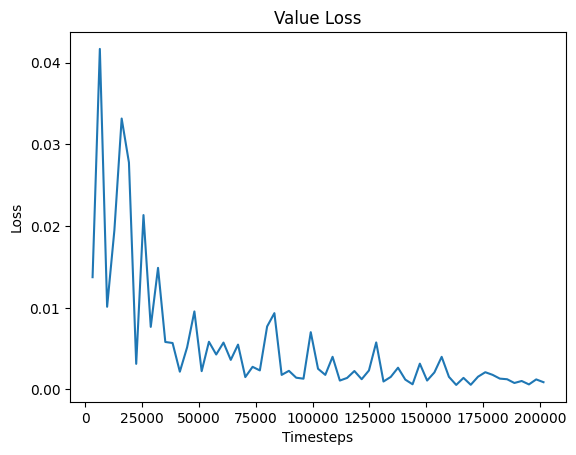

In [3]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

%matplotlib inline

ea = event_accumulator.EventAccumulator("logs/a2c_best_hp_1")  # cambia tu ruta
ea.Reload()

loss_key = "train/value_loss"
data = ea.Scalars(loss_key)

steps = [x.step for x in data]
values = [x.value for x in data]

plt.plot(steps, values)
plt.title("Value Loss")
plt.xlabel("Timesteps")
plt.ylabel("Loss")
plt.show()

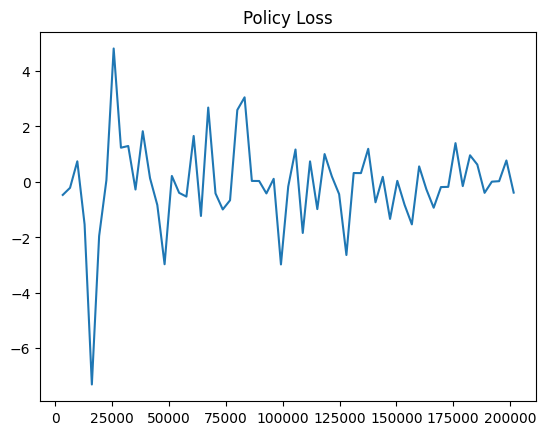

In [4]:
loss_key = "train/policy_loss"
data = ea.Scalars(loss_key)

plt.plot([x.step for x in data], [x.value for x in data])
plt.title("Policy Loss")
plt.show()

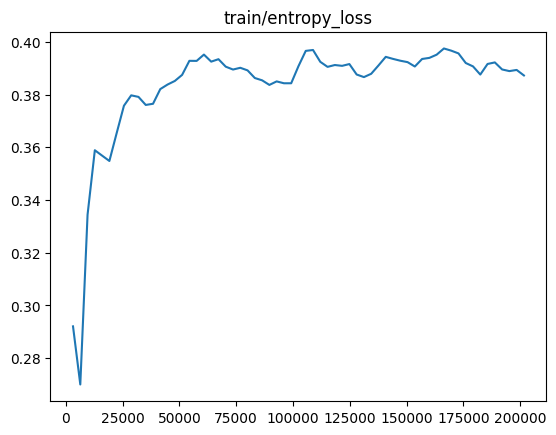

In [7]:
loss_key = "train/entropy_loss"
#loss_key = "rollout/ep_rew_mean"
#data = ea.Scalars(loss_key)

data=ea.Scalars("rollout/ep_rew_mean")

plt.plot([x.step for x in data], [x.value for x in data])
plt.title(loss_key)
plt.show()

[ScalarEvent(wall_time=1765926596.271882, step=3200, value=0.2920403480529785),
 ScalarEvent(wall_time=1765926604.353344, step=6400, value=0.26998817920684814),
 ScalarEvent(wall_time=1765926612.4808662, step=9600, value=0.33441999554634094),
 ScalarEvent(wall_time=1765926620.756518, step=12800, value=0.3588740825653076),
 ScalarEvent(wall_time=1765926628.7803988, step=16000, value=0.3568272590637207),
 ScalarEvent(wall_time=1765926636.966802, step=19200, value=0.3547993302345276),
 ScalarEvent(wall_time=1765926645.0466833, step=22400, value=0.3653540015220642),
 ScalarEvent(wall_time=1765926653.0806506, step=25600, value=0.37575414776802063),
 ScalarEvent(wall_time=1765926661.2562788, step=28800, value=0.379705011844635),
 ScalarEvent(wall_time=1765926669.4134576, step=32000, value=0.3791176676750183),
 ScalarEvent(wall_time=1765926677.4827266, step=35200, value=0.37605977058410645),
 ScalarEvent(wall_time=1765926685.789328, step=38400, value=0.3765031099319458),
 ScalarEvent(wall_tim

# VALIDATION

In [9]:
# VALIDATION
val_env = StockTradingEnv(
    df = df_val,
    stock_dim=stock_dimension,
    hmax= 100,
    initial_amount=1000000,
    num_stock_shares=num_stock_shares,
    buy_cost_pct=buy_cost_list,
    sell_cost_pct=sell_cost_list,
    state_space= state_space,
    action_space= stock_dimension,
    tech_indicator_list=INDICATORS,
    make_plots=True,
    print_verbosity=1
)

df_account_value_a2c, df_actions_a2c, last_state = agent.predict_RL(
    model=trained_model, 
    environment = val_env)


Starting prediction...
day: 250, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 995279.53
total_reward: -4720.47
total_cost: 746.53
total_trades: 4291
Sharpe: -0.050
hit end!


# TESTING

In [10]:
# AÑO 2023
test23_env = StockTradingEnv(
    df = df_test23,
    stock_dim=stock_dimension,
    hmax= 100,
    initial_amount=1000000,
    num_stock_shares=num_stock_shares,
    buy_cost_pct=buy_cost_list,
    sell_cost_pct=sell_cost_list,
    state_space= state_space,
    action_space= stock_dimension,
    tech_indicator_list=INDICATORS,
    make_plots=True,
    print_verbosity=1
)

df_account_test23_RL, df_actions_test23_RL, last_state_test23_RL = agent.predict_RL(
    model=trained_model, 
    environment = test23_env)

#df_account_test23_RL.to_csv("results/dfs/cuenta_test23_RL_baseline.csv")
#print(last_state_test23_RL[31:61] * 2000)

Starting prediction...
day: 249, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1084090.74
total_reward: 84090.74
total_cost: 883.18
total_trades: 4547
Sharpe: 1.978
hit end!


In [11]:
# AÑO 2024
test24_env = StockTradingEnv(
    df = df_test24,
    stock_dim=stock_dimension,
    hmax= 100,
    initial_amount=1000000,
    num_stock_shares=num_stock_shares,
    buy_cost_pct=buy_cost_list,
    sell_cost_pct=sell_cost_list,
    state_space= state_space,
    action_space= stock_dimension,
    tech_indicator_list=INDICATORS,
    make_plots=True,
    print_verbosity=1
)

df_account_test24_RL, df_actions_test24_RL, last_state_test24_RL = agent.predict_RL(
    model=trained_model, 
    environment = test24_env)

#df_account_test24_RL.to_csv("results/dfs/cuenta_test24_RL_baseline.csv")
#print(last_state_test24_RL[31:61])

Starting prediction...
day: 251, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1050279.57
total_reward: 50279.57
total_cost: 796.79
total_trades: 4361
Sharpe: 0.758
hit end!
